#Import


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import importlib.util
import sys
import subprocess

module_name = ['fitz', 'pytesseract', 'frontend', 'pymupdf', 'matplotlib', 'pandas', 
               'numpy', 'scipy', 'Pillow', 'io', "requests", "pypdf2", "csv", "pytrends", "tqdm", "random-word"]

for mn in module_name:
  spec = importlib.util.find_spec(mn)
  if spec:
      print(f'The {mn} module is installed')
  else:
      print(f'**** The {mn} module is NOT installed! Installation Initialized..')
      python = sys.executable
      subprocess.check_call([python, '-m', 'pip', 'install', mn],  
                            stdout=subprocess.DEVNULL)
      print(f'-->> {mn} module installation completed')

!sudo apt install tesseract-ocr

**** The fitz module is NOT installed! Installation Initialized..
-->> fitz module installation completed
**** The pytesseract module is NOT installed! Installation Initialized..
-->> pytesseract module installation completed
**** The frontend module is NOT installed! Installation Initialized..
-->> frontend module installation completed
**** The pymupdf module is NOT installed! Installation Initialized..
-->> pymupdf module installation completed
The matplotlib module is installed
The pandas module is installed
The numpy module is installed
The scipy module is installed
**** The Pillow module is NOT installed! Installation Initialized..
-->> Pillow module installation completed
The io module is installed
The requests module is installed
**** The pypdf2 module is NOT installed! Installation Initialized..
-->> pypdf2 module installation completed
The csv module is installed
**** The pytrends module is NOT installed! Installation Initialized..
-->> pytrends module installation completed


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import io, PyPDF2, requests, csv
from scipy.stats import ttest_rel 
#fitz
from PIL import Image
from pytesseract import pytesseract
from pytrends.request import TrendReq
import time
from tqdm import tqdm
from random_word import RandomWords
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import random

# Keywords

### Keywords from Analyst's-Desktop Binder 2011

In [28]:
# URL of the PDF file
url = 'https://epic.org/wp-content/uploads/foia/epic-v-dhs-media-monitoring/Analyst-Desktop-Binder-REDACTED.pdf'

# Download the PDF file
response = requests.get(url)

# Save the PDF to a file
with open('searchterms.pdf', 'wb') as f:
    f.write(response.content)


# Open the PDF file in read-binary mode
with open('searchterms.pdf', 'rb') as file:
    # Create a PDF object
    pdf = PyPDF2.PdfReader(file)
    
    # Initialize an empty list to store the extracted text
    text_list = []
    
    # Iterate through the specified pages
    for i in range(19, 23):
        # Extract the text from the page
        page = pdf.pages[i]
        text = page.extract_text()
        
        # Add the extracted text to the list
        text_list.append(text)

# Initialize an empty list to store the words
words = []

# Iterate through the extracted text
for text in text_list:
    # Split the text into words
    words += text.split()

# Print the list of words
print(words)



with open('search-terms-unfiltered.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write the list to the CSV file
    writer.writerow(words)

['21', 'Domestic', 'Security', 'Assassination', 'Attack', 'Domestic', 'security', 'Drill', 'Exercise', 'Cops', 'Law', 'enforcement', 'Authorities', 'Disaster', 'assistance', 'Disaster', 'management', 'DNDO', '(Domestic', 'Nuclear', 'Detection', 'Office)', 'National', 'preparedness', 'Mitigation', 'Prevention', 'Response', 'Recovery', 'Dirty', 'bomb', 'Domestic', 'nuclear', 'detection', 'Emergency', 'management', 'Emergency', 'response', 'First', 'responder', 'Homeland', 'security', 'Maritime', 'domain', 'awareness', '(MDA)', 'National', 'preparedness', 'initiative', 'Militia', 'Shooting', 'Shots', 'fired', 'Evacuation', 'Deaths', 'Hostage', 'Explosion', '(explosive)', 'Police', 'Disaster', 'medical', 'assistance', 'team', '(DMAT)', 'Organized', 'crime', 'Gangs', 'National', 'security', 'State', 'of', 'emergency', 'Security', 'Breach', 'Threat', 'Standoff', 'SWAT', 'Screening', 'Lockdown', 'Bomb', '(squad', 'or', 'threat)', 'Crash', 'Looting', 'Riot', 'Emergency', 'Landing', 'Pipe', 'bo

### Retriving images and reading from PDF

- The PDF shown above includes an image for page 20. We can use the PIL package to extract that page, and the pytesseract package could be used to retrieve the data from the retrieved image.


In [ ]:
# file = "searchterms.pdf"
pdf_file = fitz.open(file)

def image_check(pdf, page_no):
  """
  This function aids us in determining whether there are any images in the PDF that has been provided.
  For our project, since we only need to extract data from page number 19, only that page number is passes as argument.
  """
  page = pdf[page_no]
  image_list = page.get_images()
  if image_list:
    print(f"[+] Found a total of {len(image_list)} images in page {page_no}")
  else:
    print("[!] No images found on page", page_no)

  # storing the image (Page No 19)
  for image_index, img in enumerate(image_list, start=1):
    xref = img[0]
    base_image = pdf.extract_image(xref)
    image_bytes = base_image["image"]
    image_ext = base_image["ext"]
    image = Image.open(io.BytesIO(image_bytes))
    image.save(open(f"image{19+1}_{image_index}.{image_ext}", "wb"))

image_check(pdf_file, 19)


NameError: ignored

In [ ]:
# reading the data from the image using pytesseract
res = pytesseract.image_to_string(Image.open('image20_1.jpeg'))

# extracting the required data
firstlevel_index = res.find('DHS & Other Agencies') #stores the index of a substring or char
firstlevel = res[firstlevel_index:]
secondlevel_index = firstlevel.find('20')
secondlevel = firstlevel[:secondlevel_index]
thirdlevel_index = res.find('Alcohol Tobacco')
thirdlevel = res[thirdlevel_index:]
res = secondlevel + thirdlevel
line = res.replace('\n',', ')
line = line.replace('\x0c','')
def Convert(string):
    li = list(string.split(", ,"))
    return li

dhs = Convert(line)
dhs

In the next cell we had to clean up ceratain parts of the keywords per hand which we saved in a csv file and are in the end we end up with a dictionary with alle the categories and keywords - we did this in order so we would be able to also use other keywords or categories for further analysis if needed.

In [ ]:
# reading the cleaned data
first = pd.read_csv("/content/drive/MyDrive/CleanFCSS/first_keywords_cleaned.csv")
second = pd.read_csv("/content/drive/MyDrive/CleanFCSS/second_keywordlist_cleaned.csv")

## Creating the key names
categories = ["DHS & Other Agencies","Domestic Security", "HAZMAT & Nuclear", "Health Concern + H1N1", "Infrastructure Security", \
              "Southwest Border Violence", "Terrorism", "Weather/Disaster/Emergency", "Cyber Security"]

key_words = []
key_words2 = []
current_values = []
key_words_dict = {}

key_found = False
current_key = ''

# appending 2 cleaned CSV files
for col2 in second:
  key_words.append(col2)
for col1 in first:
  key_words.append(col1)

# Splitting the Key words if they have acronyms
for item in key_words:
    if "(" in item and ")" in item:
        parts = item.split("(")
        key_words2.append(parts[0].strip())
        key_words2.append(parts[1].strip("()"))
    else:
        key_words2.append(item)

# generating the dictionary 
for element in key_words2:
    element = element.strip()
    if element in categories:
        key_words_dict[current_key] = current_values
        current_key = element
        current_values = []
    else:
        current_values.append(element)

key_words_dict[current_key] = current_values
# my_dict = my_dict.pop('')
del key_words_dict[""]
print(key_words_dict)

{'DHS & Other Agencies': ['Department of Homeland Security', 'DHS', 'Immigration Customs Enforcement', 'ICE', 'Alcohol Tobacco and Firearms', 'ATF', 'Federal Emergency Management Agency', 'FEMA', 'Agent', 'Task Force', 'U.S. Citizenship and Immigration Services', 'CIS', 'Central Intelligence Agency', 'CIA', 'Federal Air Marshal Service', 'FAMS', 'Coast Guard', 'USCG', 'Customs and Border Protection', 'CBP', 'Fusion Center', 'Transportation Security Administration', 'TSA', 'Drug Enforcement Agency', 'DEA', 'Border Patrol', 'Air Marshal', 'Secret Service', 'USSS', 'Secure Border Initiative', 'SBI', 'Federal Aviation Administration', 'FAA', 'National Operations Center', 'NOC', 'Federal Bureau of Investigation', 'FBI', 'National Guard', 'Homeland Defense', 'Red Cross', 'United Nations', 'UN'], 'Domestic Security': ['Assassination', 'Attack', 'Domestic security', 'Drill', 'Exercise', 'Cops', 'Law enforcement', 'Authorities', 'Disaster assistance', 'Disaster management', 'DNDO', 'Domestic Nu

### Getting Keywords the used in the original paper

In [47]:
df1 = pd.read_csv("/content/drive/MyDrive/CleanFCSS/terrorism_data.csv")
terrorism_penney = df1["article"].unique().tolist()
terrorism_penney_cleaned = []
for word in terrorism_penney: 
  word = word.replace('_', ' ')
  terrorism_penney_cleaned.append(word)
print(terrorism_penney_cleaned)
print(type(terrorism_penney_cleaned))


df2 = pd.read_csv("/content/drive/MyDrive/CleanFCSS/domestic_data.csv")
domestic_penney = df2["article"].unique().tolist()
domestic_penney_cleaned = []
for word in domestic_penney: 
  word = word.replace('_', ' ')
  domestic_penney_cleaned.append(word)
print(domestic_penney_cleaned)

['abu sayyaf', 'afghanistan', 'agro', 'al-qaeda', 'al-qaeda in the arabian peninsula', 'al-qaeda in the islamic maghreb', 'al-shabaab', 'ammonium nitrate', 'attack', 'biological weapon', 'car bomb', 'chemical weapon', 'conventional weapon', 'dirty bomb', 'eco-terrorism', 'environmental terrorism', 'euskadi ta askatasuna', 'extremism', 'farc', 'fundamentalism', 'hamas', 'hezbollah', 'improvised explosive device', 'iran', 'iraq', 'irish republican army', 'islamist', 'jihad', 'nationalism', 'nigeria', 'nuclear', 'nuclear enrichment', 'pakistan', 'palestine liberation front', 'pirates', 'plo', 'political radicalism', 'recruitment', 'somalia', 'suicide attack', 'suicide bomber', 'taliban', 'tamil tigers', 'tehrik-i-taliban pakistan', 'terror', 'terrorism', 'weapons-grade', 'yemen']
<class 'list'>
['air marshal', 'alcohol and tobacco tax and trade bureau', 'border patrol', 'bureau of land management', 'central intelligence agency', 'coast guard', 'customs and border protection', 'dea', 'emer

### Create control list with random words

In [ ]:
random_words = []
r = RandomWords()
r.get_random_word()

pbar = tqdm(total=48)
while len(random_words) < 48:
  time.sleep(0.001)
  random_words.append(r.get_random_word())
  pbar.update(1)
pbar.close()

with open('random_words.csv', 'w+') as file:
    write = csv.writer(file) 
    write.writerow(random_words)

print(random_words)

"\nrandom_words = []\nr = RandomWords()\nr.get_random_word()\n\npbar = tqdm(total=48)\nwhile len(random_words) < 48:\n  time.sleep(0.001)\n  random_words.append(r.get_random_word())\n  pbar.update(1)\npbar.close()\n\nwith open('random_words.csv', 'w+') as file:\n    write = csv.writer(file) \n    write.writerow(random_words)\n\nprint(random_words)\n"

In [23]:
random_words = ['bisubstituted', 'crimean', 'restudying', 'overweakness', 'confervaceous', 'request', 'carronade', 'verandah', 'pharyngotome', 'yauper', 'distalia', 'gettable', 'unobviable', 'eccl', 'stereoradiography', 'disguisay', 'pennorth', 'pokeweeds', 'dragee', 'carburetion', 'navigability', 'myelomas', 'hypnody', 'antityrosinase', 'xray', 'defectionist', 'interlunation', 'reffo', 'anathema', 'safavi', 'oxidizability', 'hazed', 'cleronomy', 'reseek', 'heliconius', 'imprinting', 'thwartship', 'floriation', 'doughboy', 'yeniseian', 'gaulish', 'recoils', 'harpooners', 'pauses', 'optimising', 'undissonant', 'routinization', 'weanable']

#  Get Google Trends data

Which period/timeframe should we use? Marthews and Tucker used a weekly period from January 1, 2013 to December 31, 2013 (n=52). Penney used a thirty-two month period from January 2012 to August 2014 (n=32). 

In [31]:
pytrend = TrendReq(hl='en-US',timeout=(10,25),retries=8, backoff_factor=0.5,)

# Set the timeframe for the data
timeframes = ['2012-01-01 2014-12-31']

# list we use later on to get words
keywords = []

# Set category, geography and google property 
cat = '0'
geo = 'US'
gprop = ''

# dataset list to save indiviaual queries 
dataset = []

def get_google_data():
  global dataset
  pytrend.build_payload(keywords,
                        cat,
                        timeframes[0],
                        geo,
                        gprop)
  data = pytrend.interest_over_time()
  if 'isPartial' in data.columns:
    data = data.drop(['isPartial'],axis=1)   #isPartial not needed therefore drop
  dataset.append(data)
  

for searchterm in tqdm(random_words):
  time.sleep(0.1)
  keywords.append(searchterm)
  get_google_data()
  keywords.pop()

result = pd.concat(dataset, axis=1)

result.to_csv(geo + "_random" + ".csv")


100%|██████████| 48/48 [00:11<00:00,  4.13it/s]


# Process Data

### Plot Functions

In [6]:
df = pd.read_csv('/content/drive/MyDrive/CleanFCSS/CA_terrorism.csv')
df

,date,abu sayyaf,afghanistan,agro,al-qaeda in the arabian peninsula,al-qaeda in the islamic maghreb,al-shabaab,ammonium nitrate,attack,biological weapon,...,plo,recruitment,somalia,suicide attack,suicide bomber,taliban,tamil tigers,terror,terrorism,yemen
0,2012-01-01,0,35,37,0,0,0,0,0,0,...,24,75,57,0,0,10,0,40,9,32
1,2012-01-08,0,51,60,0,0,0,30,0,0,...,31,79,73,0,0,47,0,37,17,31
2,2012-01-15,0,45,40,0,0,0,38,0,0,...,12,76,74,0,0,11,0,33,18,34
3,2012-01-22,0,41,55,0,26,13,21,0,40,...,35,83,100,0,0,13,0,24,16,31
4,2012-01-29,0,42,76,0,0,0,41,0,0,...,34,83,75,0,0,9,0,31,18,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2014-11-30,38,0,0,0,0,0,0,53,0,...,64,0,64,0,25,11,45,32,25,39
153,2014-12-07,0,0,0,0,0,0,0,55,0,...,39,0,54,0,25,10,29,32,25,42
154,2014-12-14,0,0,0,57,0,0,0,81,0,...,22,0,46,0,0,100,0,41,41,37
155,2014-12-21,0,0,0,60,0,0,0,61,0,...,0,0,65,0,0,23,38,34,23,28


In [7]:
def statistics(path, name, cat):
  """ First, we create a dataframe with the desired data, and obtain the total searches for each week  """
  df = pd.read_csv(path)
  df_trans = df.transpose()
  df_trans.columns = df_trans.iloc[0]
  df_trans =  df_trans[1:]
  df2 = df_trans.sum()
  df.index.values
  
  """ Then, we divide the data in two parts:
        1. Search volume before the event
        2. Search volume after the event """
  pre_data = list(df2.values[:77])
  post_data = list(df2.values[77:154])
  x1 = df.index.values[:77] #first period
  x2 = df.index.values[77:154] #second period

  """ With this information, we can perform the linear regressions and paired t-test """
  slope_pre_june, intercept_pre_june, _, _, _ = stats.linregress(x1, pre_data) #regression pre 
  slope_post_june, intercept_post_june, _, _, _ = stats.linregress(x2, post_data) #regression post
  before = sum(pre_data)/len(pre_data)
  after = sum(post_data)/len(post_data)
  t_stat, p_val = ttest_rel(pre_data, post_data) #paired t_test

  """ Finally, we plot everything """
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.scatter(df.date[:154],df2.values[:154], label = 'Total Searches (By Week)')
  ax.set_xticklabels(df.index.values[:154], rotation = 45, ha = 'right')
  temp = ax.xaxis.get_ticklabels()
  temp = list(set(temp) - set(temp[::5]))
  for label in temp:
      label.set_visible(False)
  ax.axvline(76, label = "Mid-June 2013", color = "red")
  ax.set_ylabel("Total relative searches")# (403 keywords)")
  ax.set_xlabel("Time (Week)")
  ax.set_title(f"Pre and Post June 2013 Google Trends Searches, {name} (Outliers included) ({cat})")
  ax.plot(x1, intercept_pre_june + slope_pre_june*x1, color='black', linewidth='3', label='Trend Pre-June 2013') #plot pre
  ax.plot(x2, intercept_post_june + slope_post_june*x2, color='blue', linewidth='3', label='Trend Post-June 2013') #plot post 
  ax.legend(loc=0)
  plt.show()
  print(f"Search volume per week, before: {before}")
  print(f"Search volume per week, after: {after}")
  print("t-statistic:", t_stat)
  print("p-value:", p_val)
  return

### Plot USA

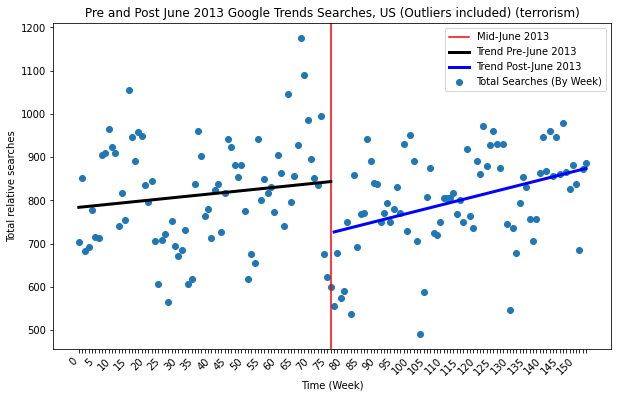

Search volume per week, before: 813.7142857142857
Search volume per week, after: 800.4935064935065
t-statistic: 0.8396530372810993
p-value: 0.40373652392688153


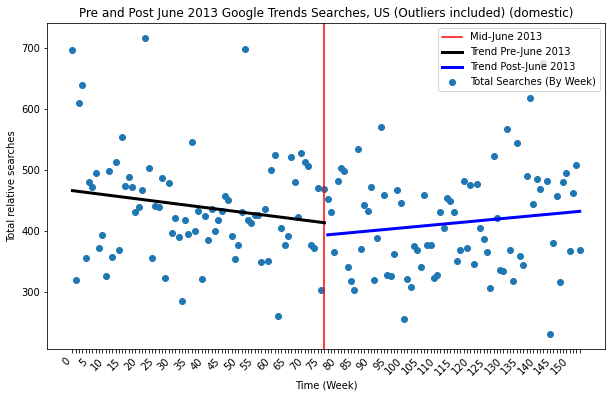

Search volume per week, before: 439.31168831168833
Search volume per week, after: 412.4155844155844
t-statistic: 1.9864325230616942
p-value: 0.050590663104865825


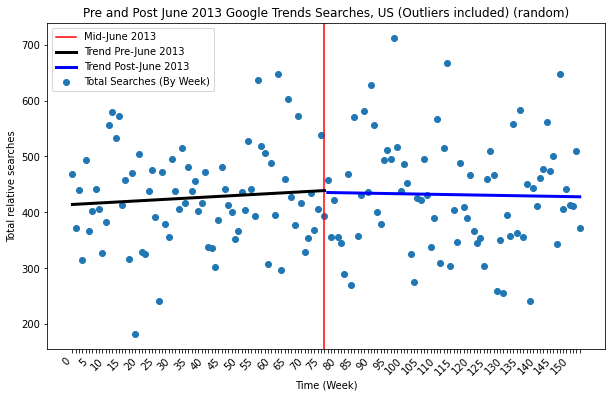

Search volume per week, before: 426.6363636363636
Search volume per week, after: 431.75324675324674
t-statistic: -0.39290384876325934
p-value: 0.6954904061801513


In [37]:
US_terorism = statistics('/content/drive/MyDrive/CleanFCSS/US_terrorism.csv', 'US', "terrorism")
US_domestic = statistics('/content/drive/MyDrive/CleanFCSS/CA_domestic.csv', 'US', "domestic")
US_random = statistics('/content/drive/MyDrive/CleanFCSS/CA_random.csv', 'US', "random")

### Plot Canada

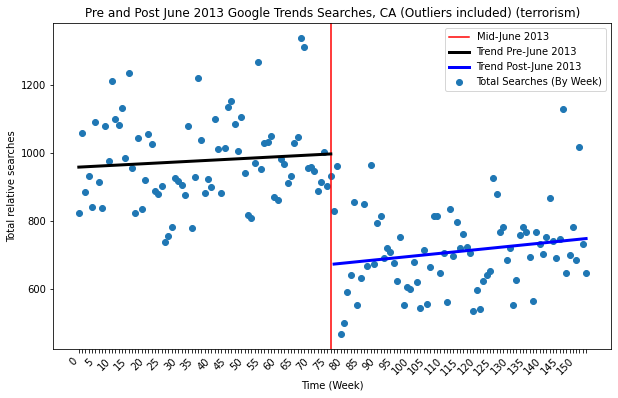

Search volume per week, before: 976.6883116883117
Search volume per week, after: 709.987012987013
t-statistic: 14.316598599373581
p-value: 2.809842742878218e-23


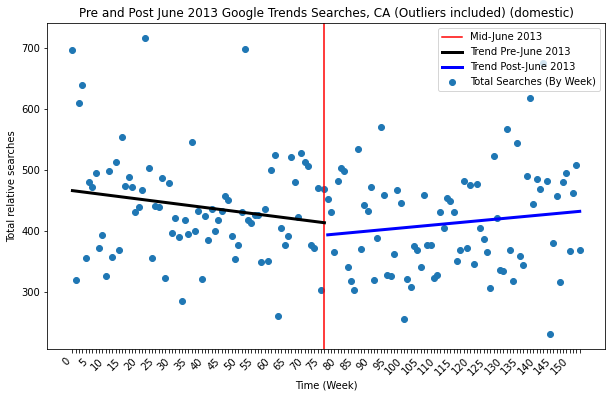

Search volume per week, before: 439.31168831168833
Search volume per week, after: 412.4155844155844
t-statistic: 1.9864325230616942
p-value: 0.050590663104865825


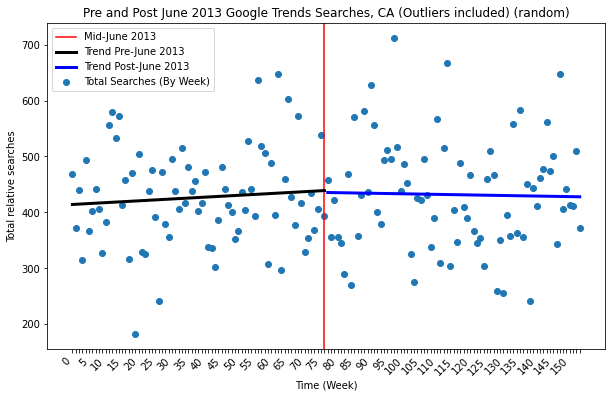

Search volume per week, before: 426.6363636363636
Search volume per week, after: 431.75324675324674
t-statistic: -0.39290384876325934
p-value: 0.6954904061801513


In [38]:
CA_terrorism = statistics('/content/drive/MyDrive/CleanFCSS/CA_terrorism.csv', 'CA', "terrorism")
CA_domestic = statistics('/content/drive/MyDrive/CleanFCSS/CA_domestic.csv', 'CA', "domestic")
CA_random = statistics('/content/drive/MyDrive/CleanFCSS/CA_random.csv', 'CA', "random")

In [ ]:
US_t, US_p = statistics('/content/drive/MyDrive/CleanFCSS/CA_terrorism.csv', 'CA', "terrorism")

### Plot Great Britain

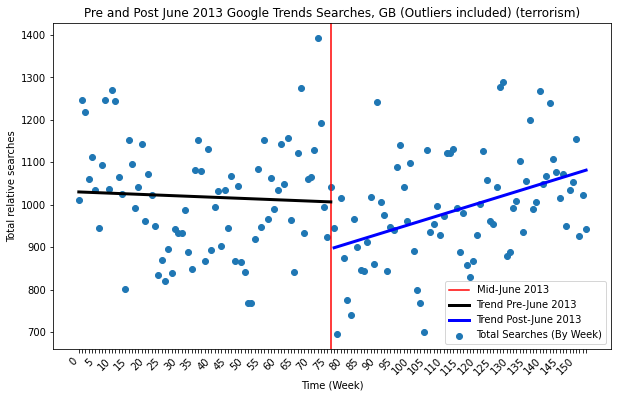

Search volume per week, before: 1018.5844155844156
Search volume per week, after: 990.2857142857143
t-statistic: 1.3373419924716174
p-value: 0.1850998078481384


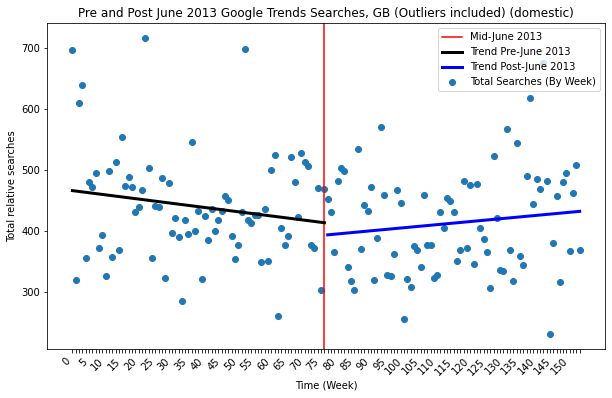

Search volume per week, before: 439.31168831168833
Search volume per week, after: 412.4155844155844
t-statistic: 1.9864325230616942
p-value: 0.050590663104865825


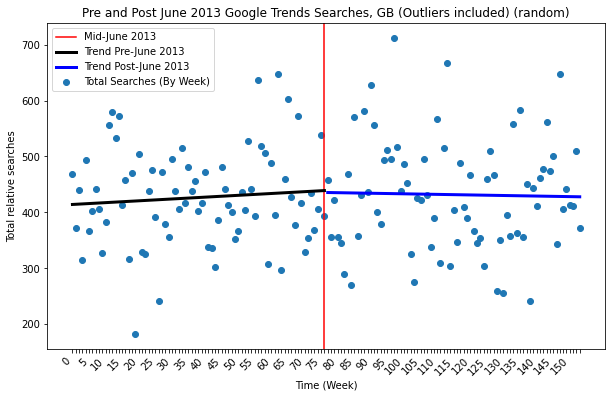

Search volume per week, before: 426.6363636363636
Search volume per week, after: 431.75324675324674
t-statistic: -0.39290384876325934
p-value: 0.6954904061801513


In [39]:
GB_terrorism = statistics('/content/drive/MyDrive/CleanFCSS/GB_terrorism.csv', 'GB', "terrorism")
GB_domestic = statistics('/content/drive/MyDrive/CleanFCSS/CA_domestic.csv', 'GB', "domestic")
GB_random = statistics('/content/drive/MyDrive/CleanFCSS/CA_random.csv', 'GB', "random")

### Grouping plots code

In [40]:
def get_data(df, week):
  """ First, we access to the dataframe with the desired data, and obtain the total searches for each week  """
  df_trans = df.transpose()
  df_trans.columns = df_trans.iloc[0]
  df_trans =  df_trans[1:]
  df2 = df_trans.sum()
  df.index.values
  
  """ Then, we divide the data in two parts:
        1. Search volume before the event
        2. Search volume after the event """
  pre_data = list(df2.values[:week+1])
  post_data = list(df2.values[week+1:154])
  x1 = df.index.values[:week+1] #first period
  x2 = df.index.values[week+1:154] #second period

  """ With this information, we can perform the linear regressions and paired t-test """
  slope_pre_june, intercept_pre_june, _, _, _ = stats.linregress(x1, pre_data) #regression pre 
  slope_post_june, intercept_post_june, _, _, _ = stats.linregress(x2, post_data) #regression post
  before = sum(pre_data)/len(pre_data)
  after = sum(post_data)/len(post_data)
  #t_stat, p_val = ttest_rel(pre_data, post_data) #paired t_test
  data = {"before":before, "after":after, "slope_pre":slope_pre_june, "slope_post":slope_post_june, "x1":x1, "x2":x2, "int_pre":intercept_pre_june, 
          "int_post":intercept_post_june, "date":df.date[:154], "values":df2.values[:154], "index":df.index.values[:154], "pre_data":pre_data, 
          "post_data":post_data} #"t_stat":t_stat, "p_val":p_val, 
  return data

In [41]:
def group_plot(can, us, gb, cat, week):
  """ Finally, we plot everything """
  #df.index.values
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.scatter(can["date"],can["values"], label = 'Total Searches (By Week, CA)', c="#1f77b4")
  ax.scatter(us["date"],us["values"], label = 'Total Searches (By Week, US)', c="#ff7f0e")
  ax.scatter(gb["date"],gb["values"], label = 'Total Searches (By Week, GB)', c="#2ca02c")
  ax.set_xticklabels(can["index"], rotation = 45, ha = 'right')
  temp = ax.xaxis.get_ticklabels()
  temp = list(set(temp) - set(temp[::5]))
  for label in temp:
    label.set_visible(False)
  ax.axvline(week, label = "Mid-June 2013", color = "red")
  ax.set_ylabel("Total relative searches")
  ax.set_xlabel("Time (Week)")
  ax.set_title(f"Pre and Post June 2013 Google Trends Searches on {cat}")
  ax.plot(can["x1"], can["int_pre"] + can["slope_pre"]*can["x1"], c='#00008B', linewidth='3') #, label=f'Trend Pre-June 2013 {can[0]}') #plot pre
  ax.plot(can["x2"], can["int_post"] + can["slope_post"]*can["x2"], c='#00008B', linewidth='3', label=f"Trend CAN") # {can[0]}') #plot post 
  ax.plot(us["x1"], us["int_pre"] + us["slope_pre"]*us["x1"], c='#8B2500', linewidth='3') #, label=f'Trend Pre-June 2013 {us[0]}') #plot pre
  ax.plot(us["x2"], us["int_post"] + us["slope_post"]*us["x2"], c='#8B2500', linewidth='3', label=f"Trend US") # {us[0]}') #plot post 
  ax.plot(gb["x1"], gb["int_pre"] + gb["slope_pre"]*gb["x1"], c='#006400', linewidth='3') #, label=f'Trend Pre-June 2013 {gb[0]}') #plot pre
  ax.plot(gb["x2"], gb["int_post"] + gb["slope_post"]*gb["x2"], c='#006400', linewidth='3', label=f"Trend GB") # {gb[0]}') #plot post 
  ax.legend(loc=0)
  plt.show()
  can_b, can_a = can["before"], can["after"]
  print(f"Search volume per week: \n")
  print(f"CAN before: {can_b}, after: {can_a}")
  #print("t-statistic:", t_stat)
  #print("p-value CAN:", can["p_val"])
  us_b, us_a = us["before"], us["after"]
  print(f"US before: {us_b}, after: {us_a}")
  #print("p-value US:", us["p_val"])
  gb_b, gb_a = gb["before"], gb["after"]
  print(f"GB before {gb_b}, after: {gb_a}")
  #print("p-value GB:", gb["p_val"])

In [44]:
GB_terrorism = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/GB_ter.csv'), 76)
CA_terrorism = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/CA_ter.csv'), 76)
US_terrorism = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/US_ter.csv'), 76)

GB_domestic = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/GB_domestic.csv'), 76)
CA_domestic = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/CA_domestic.csv'), 76)
US_domestic = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/US_domestic.csv'), 76)

GB_random = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/GB_random.csv'), 76)
CA_random  = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/CA_random.csv'), 76)
US_random  = get_data(pd.read_csv('/content/drive/MyDrive/CleanFCSS/US_random.csv'), 76)

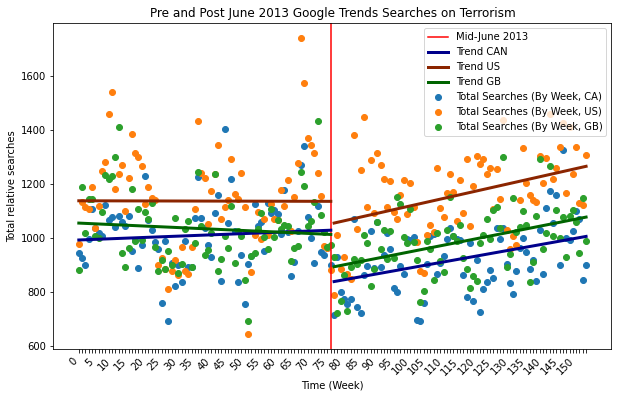

Search volume per week: 

CAN before: 1010.987012987013, after: 922.6753246753246
US before: 1136.7792207792209, after: 1160.3766233766235
GB before 1034.3766233766235, after: 985.7532467532468


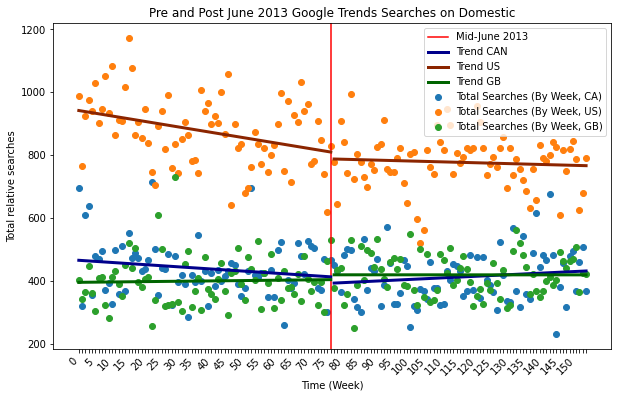

Search volume per week: 

CAN before: 439.31168831168833, after: 412.4155844155844
US before: 875.9090909090909, after: 777.1558441558442
GB before 399.83116883116884, after: 419.38961038961037


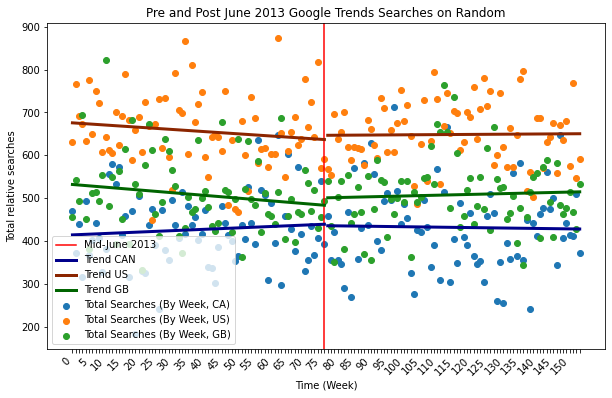

Search volume per week: 

CAN before: 426.6363636363636, after: 431.75324675324674
US before: 656.1948051948052, after: 648.4545454545455
GB before 507.61038961038963, after: 507.72727272727275


In [45]:
group_plot(CA_terrorism, US_terrorism, GB_terrorism, "Terrorism",76)
group_plot(CA_domestic, US_domestic, GB_domestic, "Domestic",76)
group_plot(CA_random, US_random, GB_random, "Random",76)

In [46]:
CA_dif_event = -sum(CA_terrorism["pre_data"][-12:])/12+sum(CA_terrorism["post_data"][:12])/12
US_dif_event = -sum(US_terrorism["pre_data"][-12:])/12+sum(US_terrorism["post_data"][:12])/12
GB_dif_event = -sum(GB_terrorism["pre_data"][-12:])/12+sum(GB_terrorism["post_data"][:12])/12
CA_t_stat, CA_p_val = ttest_rel(CA_terrorism["pre_data"][-12:], CA_terrorism["post_data"][:12]) #paired t_test: is the difference in search volume significantly different (short term, 12 weeks)
US_t_stat, US_p_val = ttest_rel(US_terrorism["pre_data"][-12:], US_terrorism["post_data"][:12]) 
GB_t_stat, GB_p_val = ttest_rel(GB_terrorism["pre_data"][-12:], GB_terrorism["post_data"][:12])
print(f"Canada drop: {CA_dif_event}, p-value {CA_p_val}, US drop: {US_dif_event}, p-value: {US_p_val}, GB drop: {GB_dif_event}, p_value: {GB_p_val}")

Canada drop: -194.33333333333337, p-value 0.011198847841780005, US drop: -177.91666666666674, p-value: 0.16981654264562848, GB drop: -218.5000000000001, p_value: 0.0010722347305603156


# Permutations

In [20]:
def permute(pathCA, pathUS, pathGB, per_n, cat):
  plotable = random.sample(range(0, per_n), 4) #choose 4 random iteration numbers
  CA_all = []
  US_all = []
  GB_all = []
  for i in range(per_n):
    rand = random.randint(12, 142) #do rnadom number
    if rand not in [74, 75, 76, 77, 78]: #dont do it if the weeks are very close to the event week 
      CA = get_data(pd.read_csv(pathCA), rand) #get data with a random week
      US = get_data(pd.read_csv(pathUS), rand)
      GB = get_data(pd.read_csv(pathGB), rand)
      CA_dif = -sum(CA["pre_data"][-12:])/12+sum(CA["post_data"][:12])/12 #Find the drop between the search volume before and after the event, short term (12 weeks)
      US_dif = -sum(US["pre_data"][-12:])/12+sum(US["post_data"][:12])/12
      GB_dif = -sum(GB["pre_data"][-12:])/12+sum(GB["post_data"][:12])/12
      CA_all.append(CA_dif)
      US_all.append(US_dif)
      GB_all.append(GB_dif)
      if i in plotable:
        group_plot(CA, US, GB, cat, rand) #plot 4 random iterations
  results = {"Canada":CA_all, "US":US_all, "GB":GB_all}
  return results

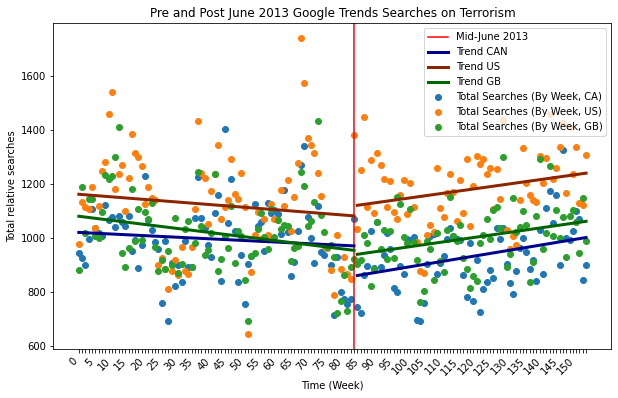

Search volume per week: 

CAN before: 996.0119047619048, after: 931.8142857142857
US before: 1121.952380952381, after: 1180.5285714285715
GB before 1017.6190476190476, after: 1001.0


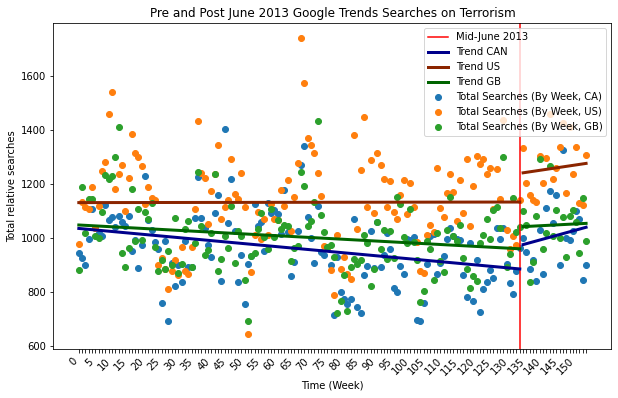

Search volume per week: 

CAN before: 960.7014925373135, after: 1007.9
US before: 1132.1567164179105, after: 1258.6
GB before 1004.3582089552239, after: 1048.3


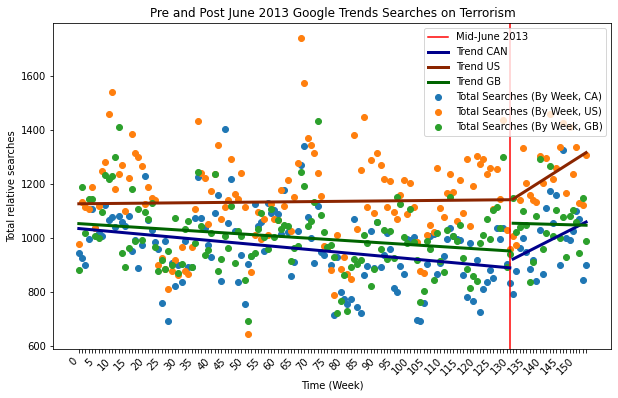

Search volume per week: 

CAN before: 962.587786259542, after: 991.0
US before: 1134.2519083969466, after: 1230.1739130434783
GB before 1002.8549618320611, after: 1051.1304347826087


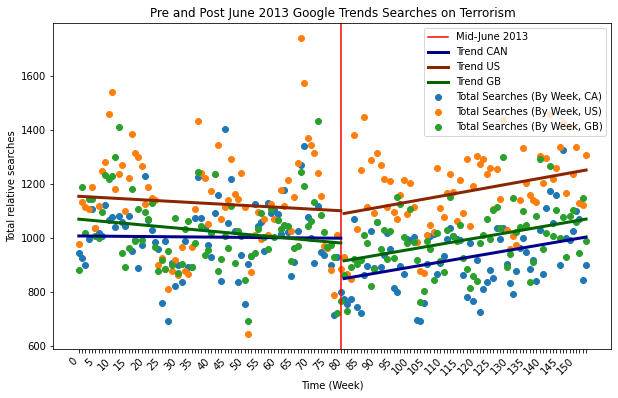

Search volume per week: 

CAN before: 1003.625, after: 927.0540540540541
US before: 1127.725, after: 1171.1216216216217
GB before 1025.8375, after: 993.0135135135135


In [21]:
#Terrorism_30 honestly doesn't show much, so now we only will be working with terrorism and domestic
Permutations = permute('/content/drive/MyDrive/CleanFCSS/CA_ter.csv', '/content/drive/MyDrive/CleanFCSS/US_ter.csv', '/content/drive/MyDrive/CleanFCSS/GB_ter.csv', 1000, "Terrorism")

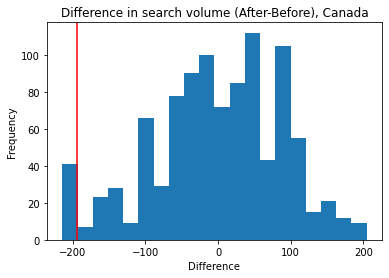

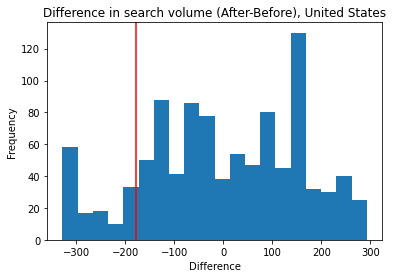

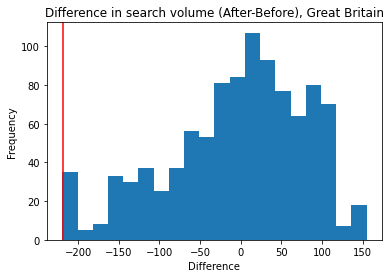

In [ ]:
def plot_histogram(Country, dif, name):
  plt.hist(Permutations[Country], bins=20)
  plt.axvline(x=dif, color='r')

  # set the plot title and axis labels
  plt.title(f'Difference in search volume (After-Before), {name}')
  plt.xlabel('Difference')
  plt.ylabel('Frequency')
  plt.show()

plot_histogram("Canada", CA_dif_event, "Canada")
plot_histogram("US", US_dif_event, "United States")
plot_histogram("GB", GB_dif_event, "Great Britain")

In [ ]:
CA_t_stat, CA_p_val = ttest_rel(CA["pre_data"][-8:], CA["post_data"][:8]) #paired t_test: is the difference in search volume significantly different (short term, 8 weeks)
US_t_stat, US_p_val = ttest_rel(US["pre_data"][-8:], US["post_data"][:8]) #paired t_test: is the difference in search volume significantly different (short term, 8 weeks)
GB_t_stat, GB_p_val = ttest_rel(GB["pre_data"][-8:], GB["post_data"][:8]) #paired t_test: is the difference in search volume significantly different (short term, 8 weeks)
CA_drop = sum(CA["pre_data"][-8:])/8>sum(CA["post_data"][:8])/8 #True if there was a drop, False if not
US_drop = sum(US["pre_data"][-8:])/8>sum(US["post_data"][:8])/8
GB_drop = sum(GB["pre_data"][-8:])/8>sum(GB["post_data"][:8])/8
#CA_all.append([CA_p_val, CA_drop])
#US_all.append([US_p_val, US_drop])
#GB_all.append([GB_p_val, GB_drop])